## CNN
- 이미지 영상인식의 혁명과도 같은 CNN
- 입력 -> 특징 검출 -> 분류
- CNN은 사진에서 특징을 검출해내는 layer가 있다

### Convolutional Filter
- 학습을 통해 필터까지 구할 수 있다
- Conv 필터의 의미
    - Convolution: 특정 패턴이 있는지 박스로 훑으며 마킹
    - 위아래선필터, 좌우선필터, 대각선필터, 이런질감필터, 요런질감필터, 동그라미필터 등등 여러가지 '조각'필터로 해당 패턴이 그림위에 있는지 확인한다
    - Convolution 박스로 밀고나면, 숫자가 나옴
    - 그 숫자를 Activation(주로 ReLU)에 넣어 나온 값 
    - 이걸로 이미지 지도를 새로 그린다

### 풀링의 의미
- 점점 더 멀리서 보는 법 -> 그림을 줄여서
- MaxPooling
    - 사이즈를 점진적으로 줄이는 법 MaxPooling
    - nxn(Pool)을 중요한 정보(Max)한개로 줄인다.
    - 선명한 정보만 남겨서, 판단과 학습이 쉬워지고 노이즈가 줄면서, 덤으로 융퉁성도 확보된다
    - 보통 2x2로 화면 전역에 적용한다.
    - stride라고 해서 좌우로 몇칸씩 뛸지 설정. 보통(2x2)

### Conv Layer의 의미
- 패턴들을 쌓아가며 점차 복잡한 패턴을 인식한다(conv)
- 사이즈를 줄여가며, 더욱 추상화 해나간다(maxpooling)

### Zero padding
- 귀퉁이가 짤리다보니, 사이즈 유지를 위해 conv전에 0을 모서리에 보태고 한다.
- padding='same'

### Dropout
- 뉴럴넷에게 융통성을 기르는 방법은? 가르칠 때부터, 좀 가리면서 가리친다
- 학습시킬 때, 일부러 정보를 누락시키거나 중간 중간 노드를 끈다

### 데이터

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

#### 모델 구성

![cnn](../data/cnn.png)

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1000)              3

#### 모델 훈련

In [4]:
%%time

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1032 - accuracy: 0.9680 - val_loss: 0.0403 - val_accuracy: 0.9866
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0351 - val_accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0311 - val_accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0235 - val_accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0318 - val_accuracy: 0.9907
Wall time: 3min 21s


In [6]:
import matplotlib.pyplot as plt

#### 훈련 상황

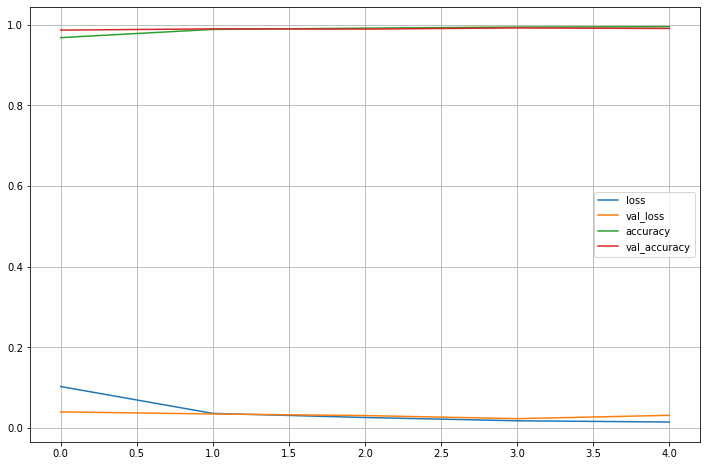

In [7]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

- 학습이 매우 잘됨

#### Test Accuracy

In [14]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0318 - accuracy: 0.9907
Test loss:  0.03178421035408974
Test accuracy:  0.9907000064849854


#### 틀린 데이터

In [8]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [9]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

93

In [12]:
import random

samples = random.choices(population=wrong_result, k=16)

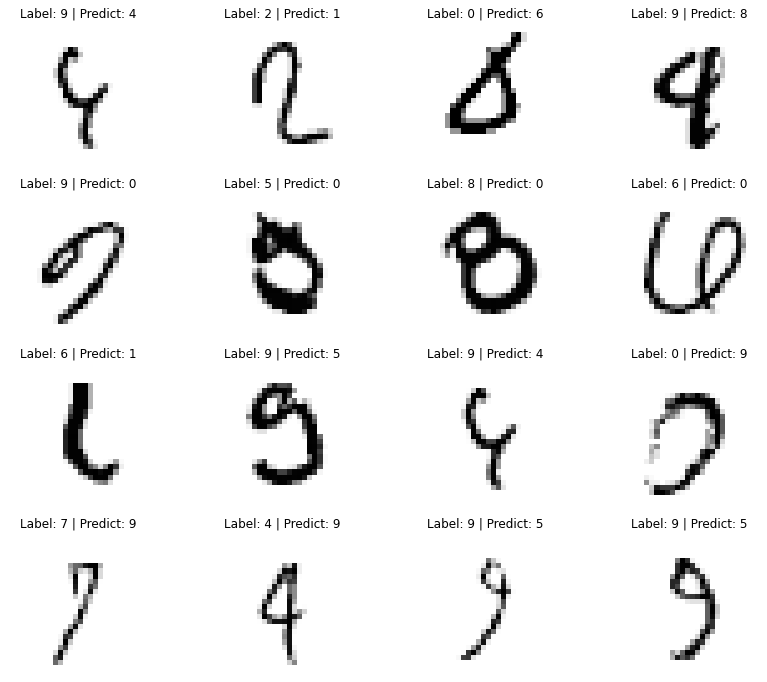

In [13]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label: ' + str(y_test[n]) + ' | Predict: ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

#### 모델 저장

In [15]:
model.save('MNIST_CNN_model.h5')

#### 모델 불러오기

In [17]:
from keras.models import load_model

model = load_model('MNIST_CNN_model.h5')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1000)              3

### Fashion MNIST에도 적용

In [19]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [20]:
%%time

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3670 - accuracy: 0.8706 - val_loss: 0.2706 - val_accuracy: 0.9006
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2257 - accuracy: 0.9163 - val_loss: 0.2566 - val_accuracy: 0.9073
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1818 - accuracy: 0.9317 - val_loss: 0.2412 - val_accuracy: 0.9135
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1460 - accuracy: 0.9451 - val_loss: 0.2537 - val_accuracy: 0.9167
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1172 - accuracy: 0.9567 - val_loss: 0.2876 - val_accuracy: 0.9125
Wall time: 3min 28s


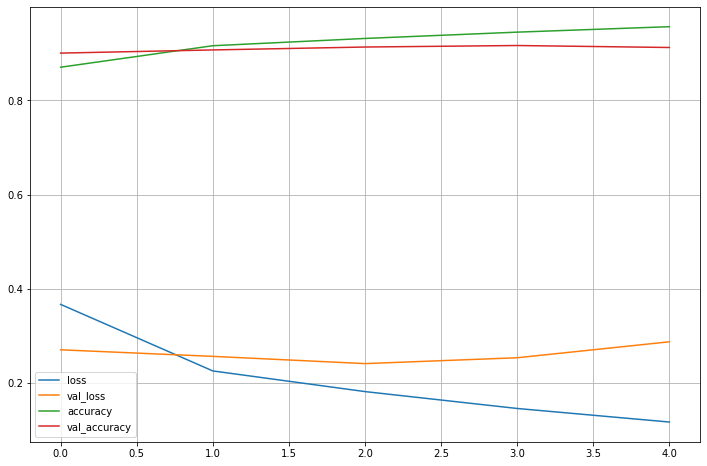

In [21]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

- 약간의 과적합이 관찰되기도 한다

In [22]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2876 - accuracy: 0.9125
Test loss:  0.28757157921791077
Test accuracy:  0.9125000238418579
